In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

In [4]:
csv_path = "../../results/task_shift-26122021.csv"

In [6]:
df = pd.read_csv(csv_path)

In [7]:
df

,Method,Action recognition (Top-1),Spatio-temporal (IoU@0.5),Repetition (MAE),AoT (Top-1)
0,No pretraining,75.36,0.3273,0.2320,78.21
1,RSPNET,84.88,0.4401,0.1600,79.52
2,Video Moco,85.59,0.4374,0.1759,94.12
3,Pretext-Contrast,85.83,0.4619,0.1685,95.78
4,Selavi,86.60,0.4192,0.1512,94.83
5,TCLR,89.77,0.4764,0.1493,97.12
6,CTP,90.77,0.4646,0.1783,95.69
7,GDT,91.14,0.4629,0.1367,95.52
8,Supervised pretraining,94.08,0.4825,0.1366,95.71


In [19]:
methods = df["Method"].values
tasks = set(df.columns) - {"Method"}

flat_df = []
for i, m in enumerate(methods):
    for t in tasks:
        flat_df.append([m, t, df.loc[i, t]])

flat_df = pd.DataFrame(flat_df, columns=["Method", "Task", "Metric"])

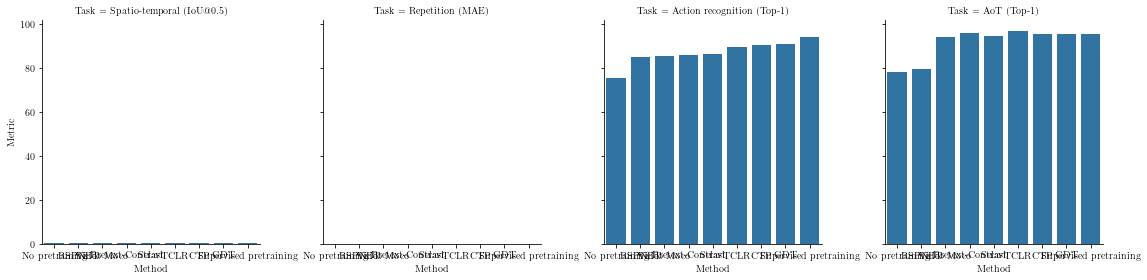

In [28]:
g = sns.FacetGrid(flat_df, col="Task", height=4)
g.map(sns.barplot, "Method", "Metric", order=methods)
plt.show()

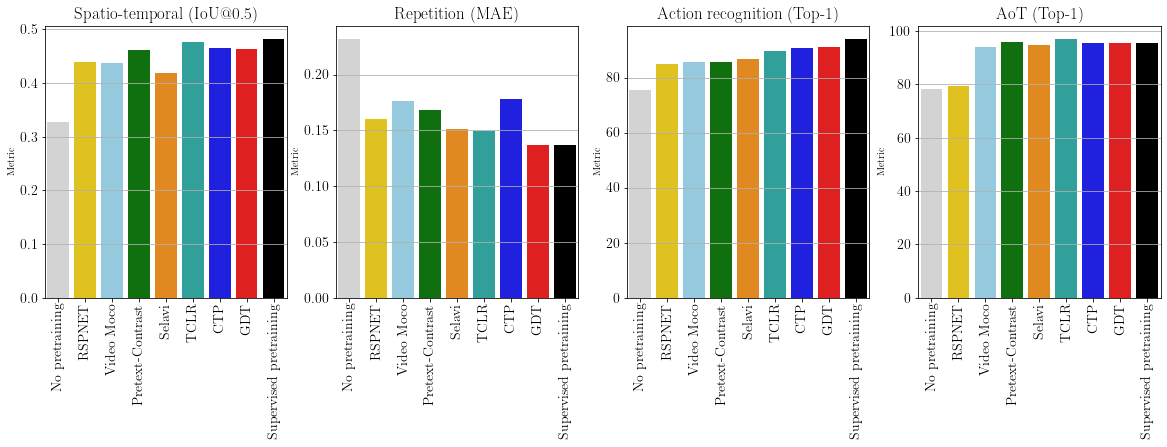

In [110]:
fig, axes = plt.subplots(1, len(tasks), figsize=(20, 5))

for i, t in enumerate(tasks):
    ax = axes[i]
    ax.set_title(t, fontsize=17)
    ax.grid()
    
    subdf = flat_df[flat_df["Task"] == t]
    sns.barplot(data=subdf, x="Method", y="Metric", ax=ax, palette=["lightgray", "gold", "skyblue", "green", "darkorange", "lightseagreen", "blue", "red", "black"])

    ax.tick_params(axis='x', rotation=90, labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    # labels = [x.get_text() for x in ax.get_xticklabels()]
    # ax.legend(labels)
    # ax.set_xticks([])
    ax.set_xlabel("")

plt.savefig("../../results/plots/task-shift-1.pdf", bbox_inches="tight")
plt.show()

In [48]:
def heatmap(
        df,
        figsize=(7, 6),
        title="Action classification",
        titlesize=20,
        labelsize=15,
        tickssize=13,
        save=False,
        save_path="../../results/plots/sample.pdf",
        **kwargs,
    ):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    if "cmap" not in kwargs:
        kwargs.update(dict(cmap="YlGnBu"))
    sns.heatmap(df, ax=ax, **kwargs)

    ax.set_title(title, fontsize=titlesize)

    ax.set_xlabel("Dataset")
    ax.set_ylabel("Method")
    
    ax.yaxis.label.set_size(labelsize)
    ax.xaxis.label.set_size(labelsize)

    ax.tick_params(axis='x', labelsize=tickssize)
    ax.tick_params(axis='y', labelsize=tickssize)
    
    if save:
        plt.savefig(save_path, bbox_inches="tight")

    plt.show()

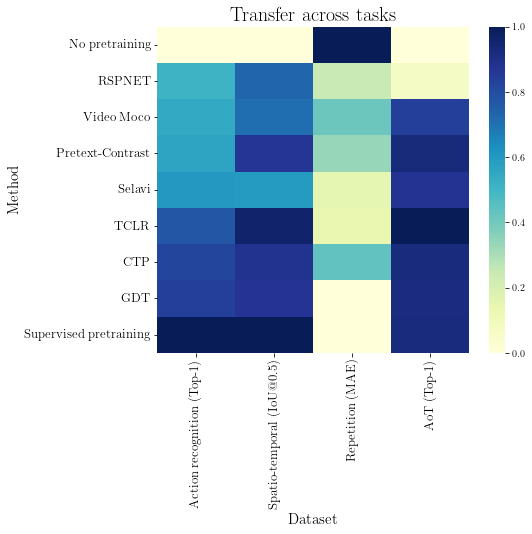

In [56]:
norm_df = df.set_index("Method")
norm_df = (norm_df - norm_df.min()) / (norm_df.max() - norm_df.min())

heatmap(norm_df, title="Transfer across tasks")

In [59]:
norm_df["Action recognition (Top-1)"].values

array([0.        , 0.50854701, 0.54647436, 0.55929487, 0.60042735,
       0.76976496, 0.82318376, 0.84294872, 1.        ])

In [61]:
norm_df["Spatio-temporal (IoU@0.5)"].values

array([0.        , 0.72680412, 0.70940722, 0.86726804, 0.59213918,
       0.96069588, 0.88466495, 0.87371134, 1.        ])

In [64]:
np.corrcoef(norm_df["Action recognition (Top-1)"].values, norm_df["Spatio-temporal (IoU@0.5)"].values)

array([[1.        , 0.92527473],
       [0.92527473, 1.        ]])

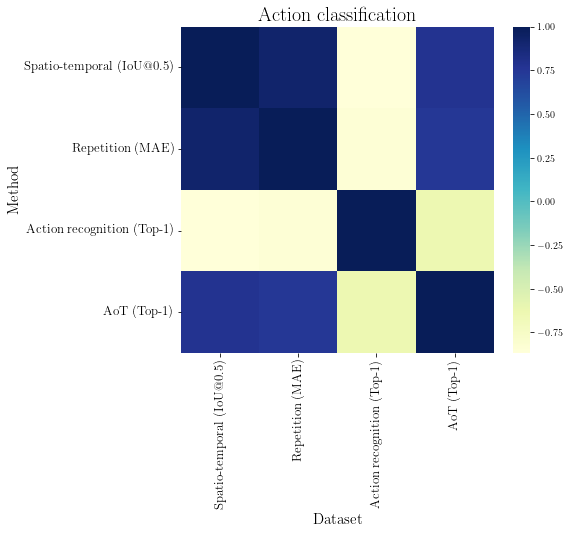

In [77]:
corr_df = pd.DataFrame(np.corrcoef(norm_df.T), index=tasks, columns=tasks)
heatmap(corr_df)

In [68]:
norm_df.shape

(9, 4)

In [76]:
corr_df

,Spatio-temporal (IoU@0.5),Repetition (MAE),Action recognition (Top-1),AoT (Top-1)
Spatio-temporal (IoU@0.5),1.000000,0.925275,-0.866820,0.775230
Repetition (MAE),0.925275,1.000000,-0.841615,0.746348
Action recognition (Top-1),-0.866820,-0.841615,1.000000,-0.634013
AoT (Top-1),0.775230,0.746348,-0.634013,1.000000


In [78]:
norm_df

,Action recognition (Top-1),Spatio-temporal (IoU@0.5),Repetition (MAE),AoT (Top-1)
Method,,,,
No pretraining,0.000000,0.000000,1.000000,0.000000
RSPNET,0.508547,0.726804,0.245283,0.069276
Video Moco,0.546474,0.709407,0.411950,0.841354
Pretext-Contrast,0.559295,0.867268,0.334382,0.929138
Selavi,0.600427,0.592139,0.153040,0.878900
TCLR,0.769765,0.960696,0.133124,1.000000
CTP,0.823184,0.884665,0.437107,0.924379
GDT,0.842949,0.873711,0.001048,0.915389
Supervised pretraining,1.000000,1.000000,0.000000,0.925436


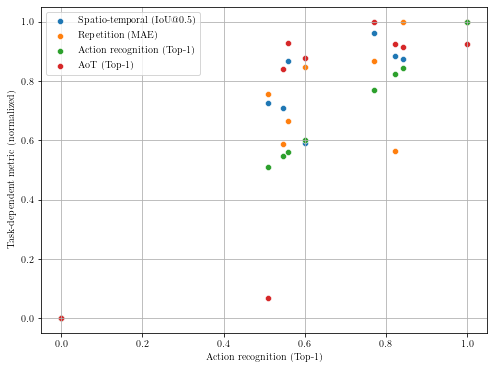

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
norm_df["Repetition (MAE)"] = 1 - norm_df["Repetition (MAE)"]

ax.grid()
for t in tasks:
    sns.scatterplot(x=norm_df["Action recognition (Top-1)"], y=norm_df[t], label=t, ax=ax)

ax.set_ylabel("Task-dependent metric (normalized)")
plt.show()